# MOBILE CLASSIFICATION MODEL

In [ ]:
import pandas as pd #linear alegbra
import numpy as np #data processing

* this project aims to develop a machine learning model that can classify mobile phones into different price ranges based on their features.


In [ ]:
import pickle
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

pd.set_option('display.max_columns', None)

warnings.filterwarnings('ignore')
warnings.warn('ignore')

## Problem Statement
**The task is to build a predictive model that can accurately classify mobile phones into predefined price ranges based on various attributes such as battery power, camera features, memory, connectivity options, and more. The dataset provided contains information about several mobile phones, including their specifications and corresponding price ranges.**

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
categories = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range']


In [ ]:
df.drop(columns = categories).describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.52,439.42,501.0,851.75,1226.0,1615.25,1998.0
clock_speed,2000.0,1.52,0.82,0.5,0.70,1.5,2.20,3.0
fc,2000.0,4.31,4.34,0.0,1.00,3.0,7.00,19.0
int_memory,2000.0,32.05,18.15,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50,0.29,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.25,35.40,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52,2.29,1.0,3.00,4.0,7.00,8.0
pc,2000.0,9.92,6.06,0.0,5.00,10.0,15.00,20.0
px_height,2000.0,645.11,443.78,0.0,282.75,564.0,947.25,1960.0
px_width,2000.0,1251.52,432.20,500.0,874.75,1247.0,1633.00,1998.0


## Objectives
- Explore and preprocess the dataset to handle missing values, outliers, and any other data inconsistencies. - Perform exploratory data analysis (EDA) to gain insights into the relationships between different features and the target variable (price range). - Select appropriate machine learning algorithms for classification and evaluate their performance using suitable metrics. - Fine-tune the chosen model to improve its predictive accuracy. - Validate the final model using cross-validation techniques to ensure its robustness. - Deploy the model for real-time predictions if applicable.

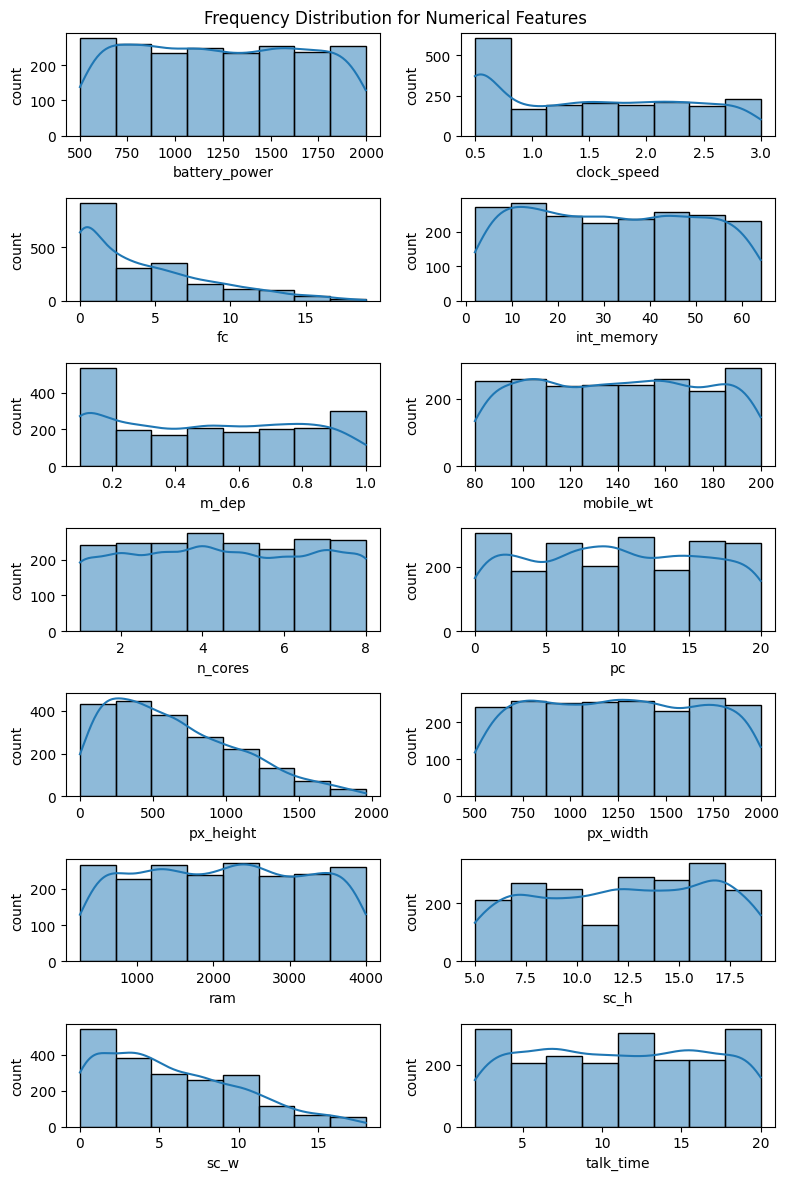

In [ ]:
plt.figure(figsize = (8, 12))

for i, col in enumerate(df.drop(columns = categories).columns):
    # plt.subplot(7, 2, i+1)
    # sns.histplot(data = df.drop(columns = categories), x = col, kde = True, bins = 8)
    # plt.title(f'frequency vs "{col}"')

    ax = plt.subplot(7, 2, i+1)
    # ax.hist(x = col, data = df.drop(columns = categories))
    sns.histplot(data = df.drop(columns = categories), x = col, kde = True, bins = 8, ax = ax)
    ax.set_xlabel(col, fontsize = 10)
    ax.set_ylabel('count', fontsize = 10)
    # ax.set_title(col, fontsize = 10)

plt.suptitle("Frequency Distribution for Numerical Features")
plt.tight_layout()
# plt.show()


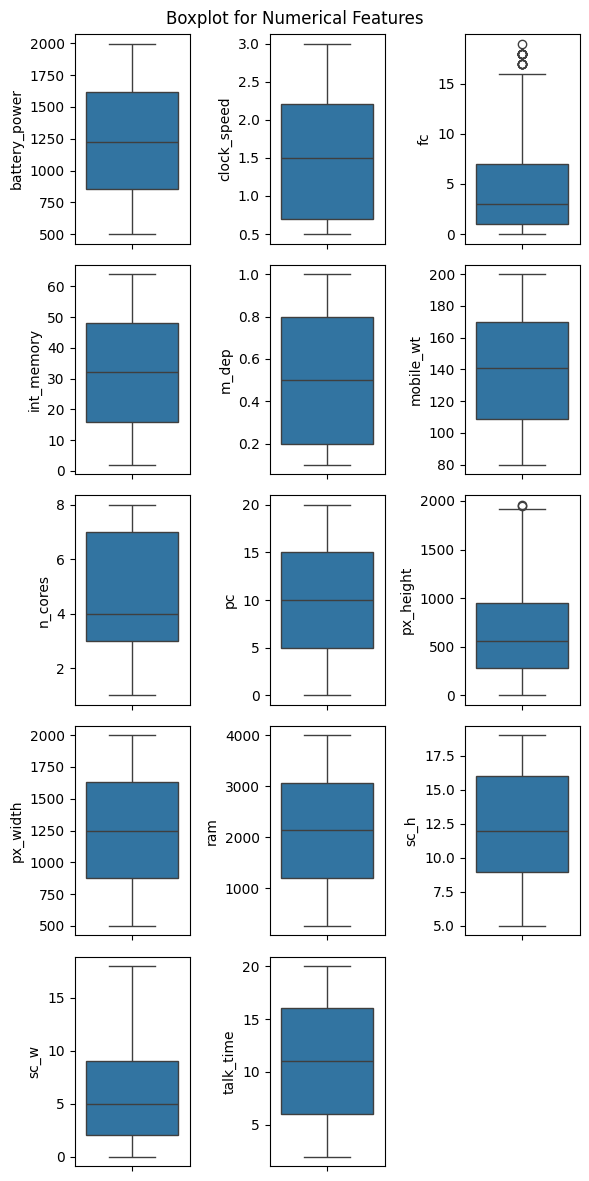

In [ ]:
plt.figure(figsize = (6, 12))

for i, col in enumerate(df.drop(columns = categories).columns):
    ax = plt.subplot(5, 3, i+1)
    # sns.boxplot(x=df['price_range'], y=df[col])
    # plt.title(f'boxplot for {col.capitalize()} vs Price_range')

    # sns.boxplot(x=df['price_range'], y=df[col], ax = ax)

    sns.boxplot(df[col], ax = ax)

    # ax.set_xlabel('price_range', fontsize = 10)

    ax.set_ylabel(f'{col}', fontsize = 10)

    # ax.set_title(f'"{col}" vs "price_range"', fontsize = 10)
    # ax.set_title(col, fontsize = 10)

plt.suptitle("Boxplot for Numerical Features")
plt.tight_layout()
plt.show();


# Conclusion:
* By looking at the above, we can easily understand the statistical values of each feature, including the minimum and maximum values, and the average and standard deviation. * Some features, including __fc (Front Camera mega pixels)__, and __px_height (Pixel Resolution Height)__ are affected by __outlier__ or __noise__!

## ANALYSIS OF CATEGORIAL VARIABLES

In [ ]:
df['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

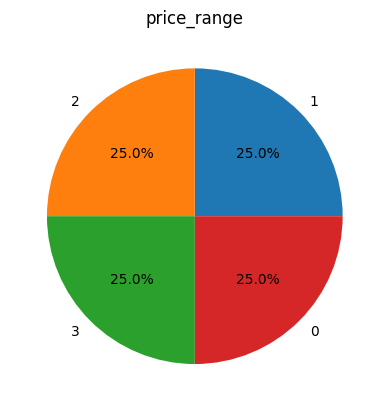

In [ ]:
plt.pie(df['price_range'].value_counts(), labels=df['price_range'].value_counts().index, autopct='%1.1f%%');
plt.title('price_range');

In [ ]:
count_values = {col : df[col].value_counts(normalize = True).values*100 for col in df[categories].drop(columns = 'price_range').columns}
count_values = pd.DataFrame.from_dict(count_values).T
count_values

,0,1
blue,50.50,49.50
dual_sim,50.95,49.05
four_g,52.15,47.85
three_g,76.15,23.85
touch_screen,50.30,49.70
wifi,50.70,49.30


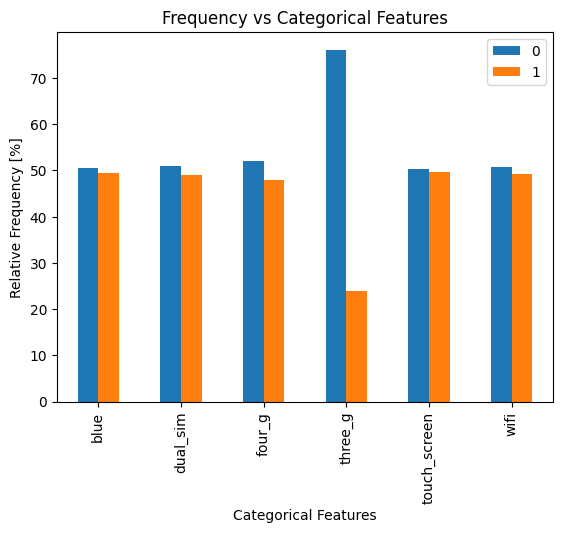

In [ ]:
count_values.plot(kind = 'bar')
plt.xlabel('Categorical Features')
plt.ylabel('Relative Frequency [%]')
plt.title('Frequency vs Categorical Features');

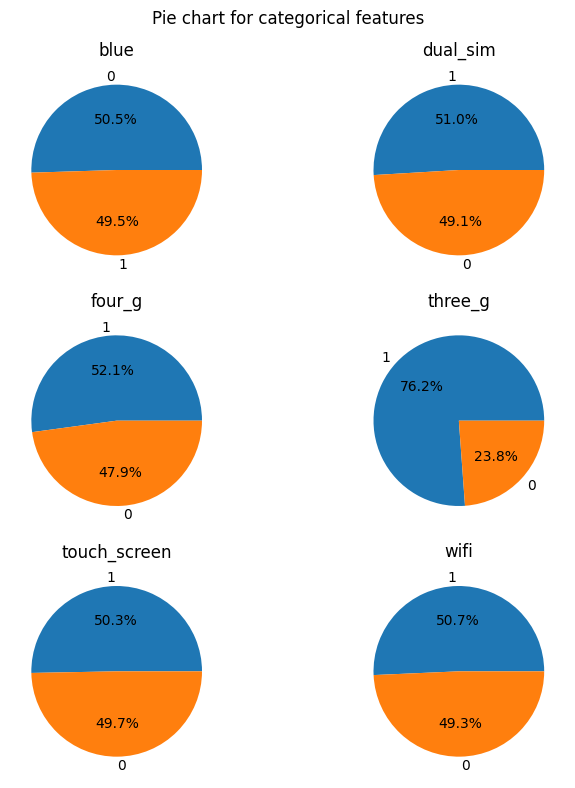

In [ ]:
plt.figure(figsize = (8, 8))

for i, col in enumerate(df[categories].drop(columns = 'price_range').columns):
    plt.subplot(3, 2, i+1)
    plt.pie(df[col].value_counts(), labels=df[col].value_counts().index, autopct='%1.1f%%')
    plt.title(col)

plt.suptitle("Pie chart for categorical features")
plt.tight_layout()
plt.show();

# DATA CLEANING

In [ ]:
noisy_columns = ['fc', 'px_height']

In [ ]:
n_noisy_row = []
for noisy_col in noisy_columns:
    low, high = df[noisy_col].quantile([0.05, 0.95])
    noisy_row = df[~df[noisy_col].between(low, high)].index
    n_noisy_row.append(len(noisy_row))

In [ ]:
pd.DataFrame({
    'Noisy Columns' : noisy_columns,
    'Number of Noise' : n_noisy_row
})

,Noisy Columns,Number of Noise
0,fc,85
1,px_height,200


## PEARSON COFFICIENT

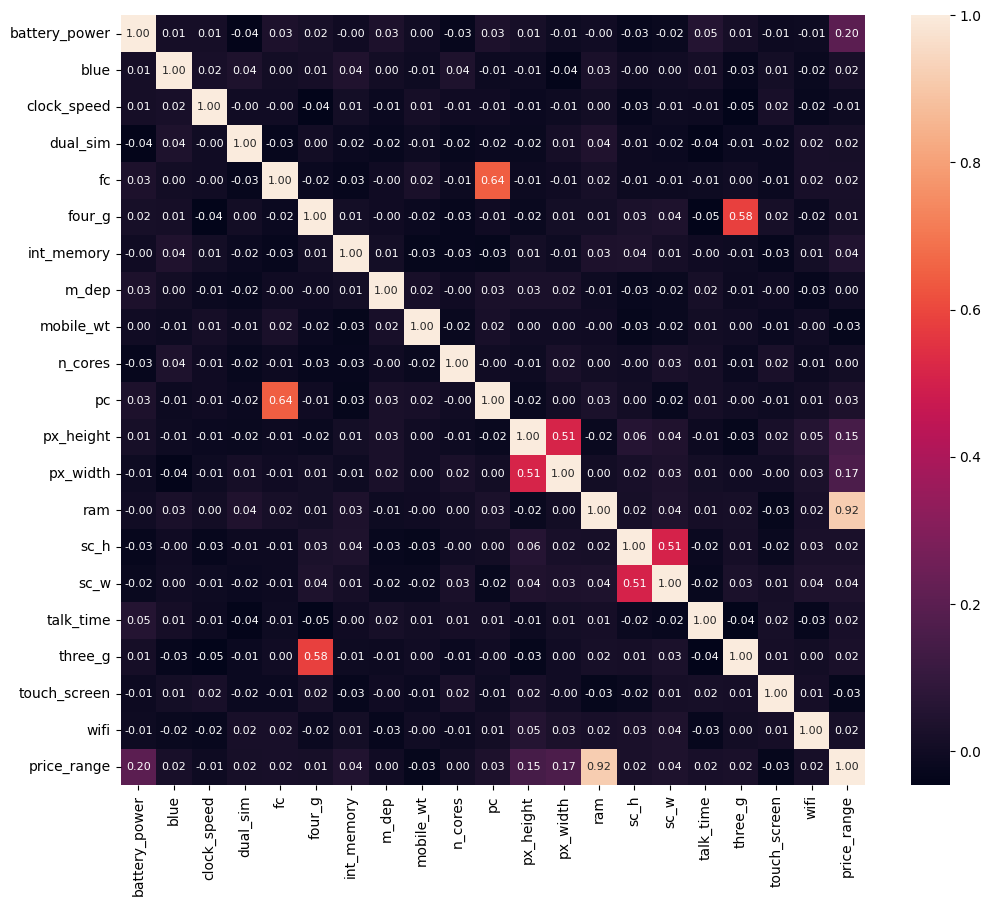

In [ ]:
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot = True, fmt='.2f', annot_kws={'size': 8});


 # **BIVARIATE ANALYSIS**

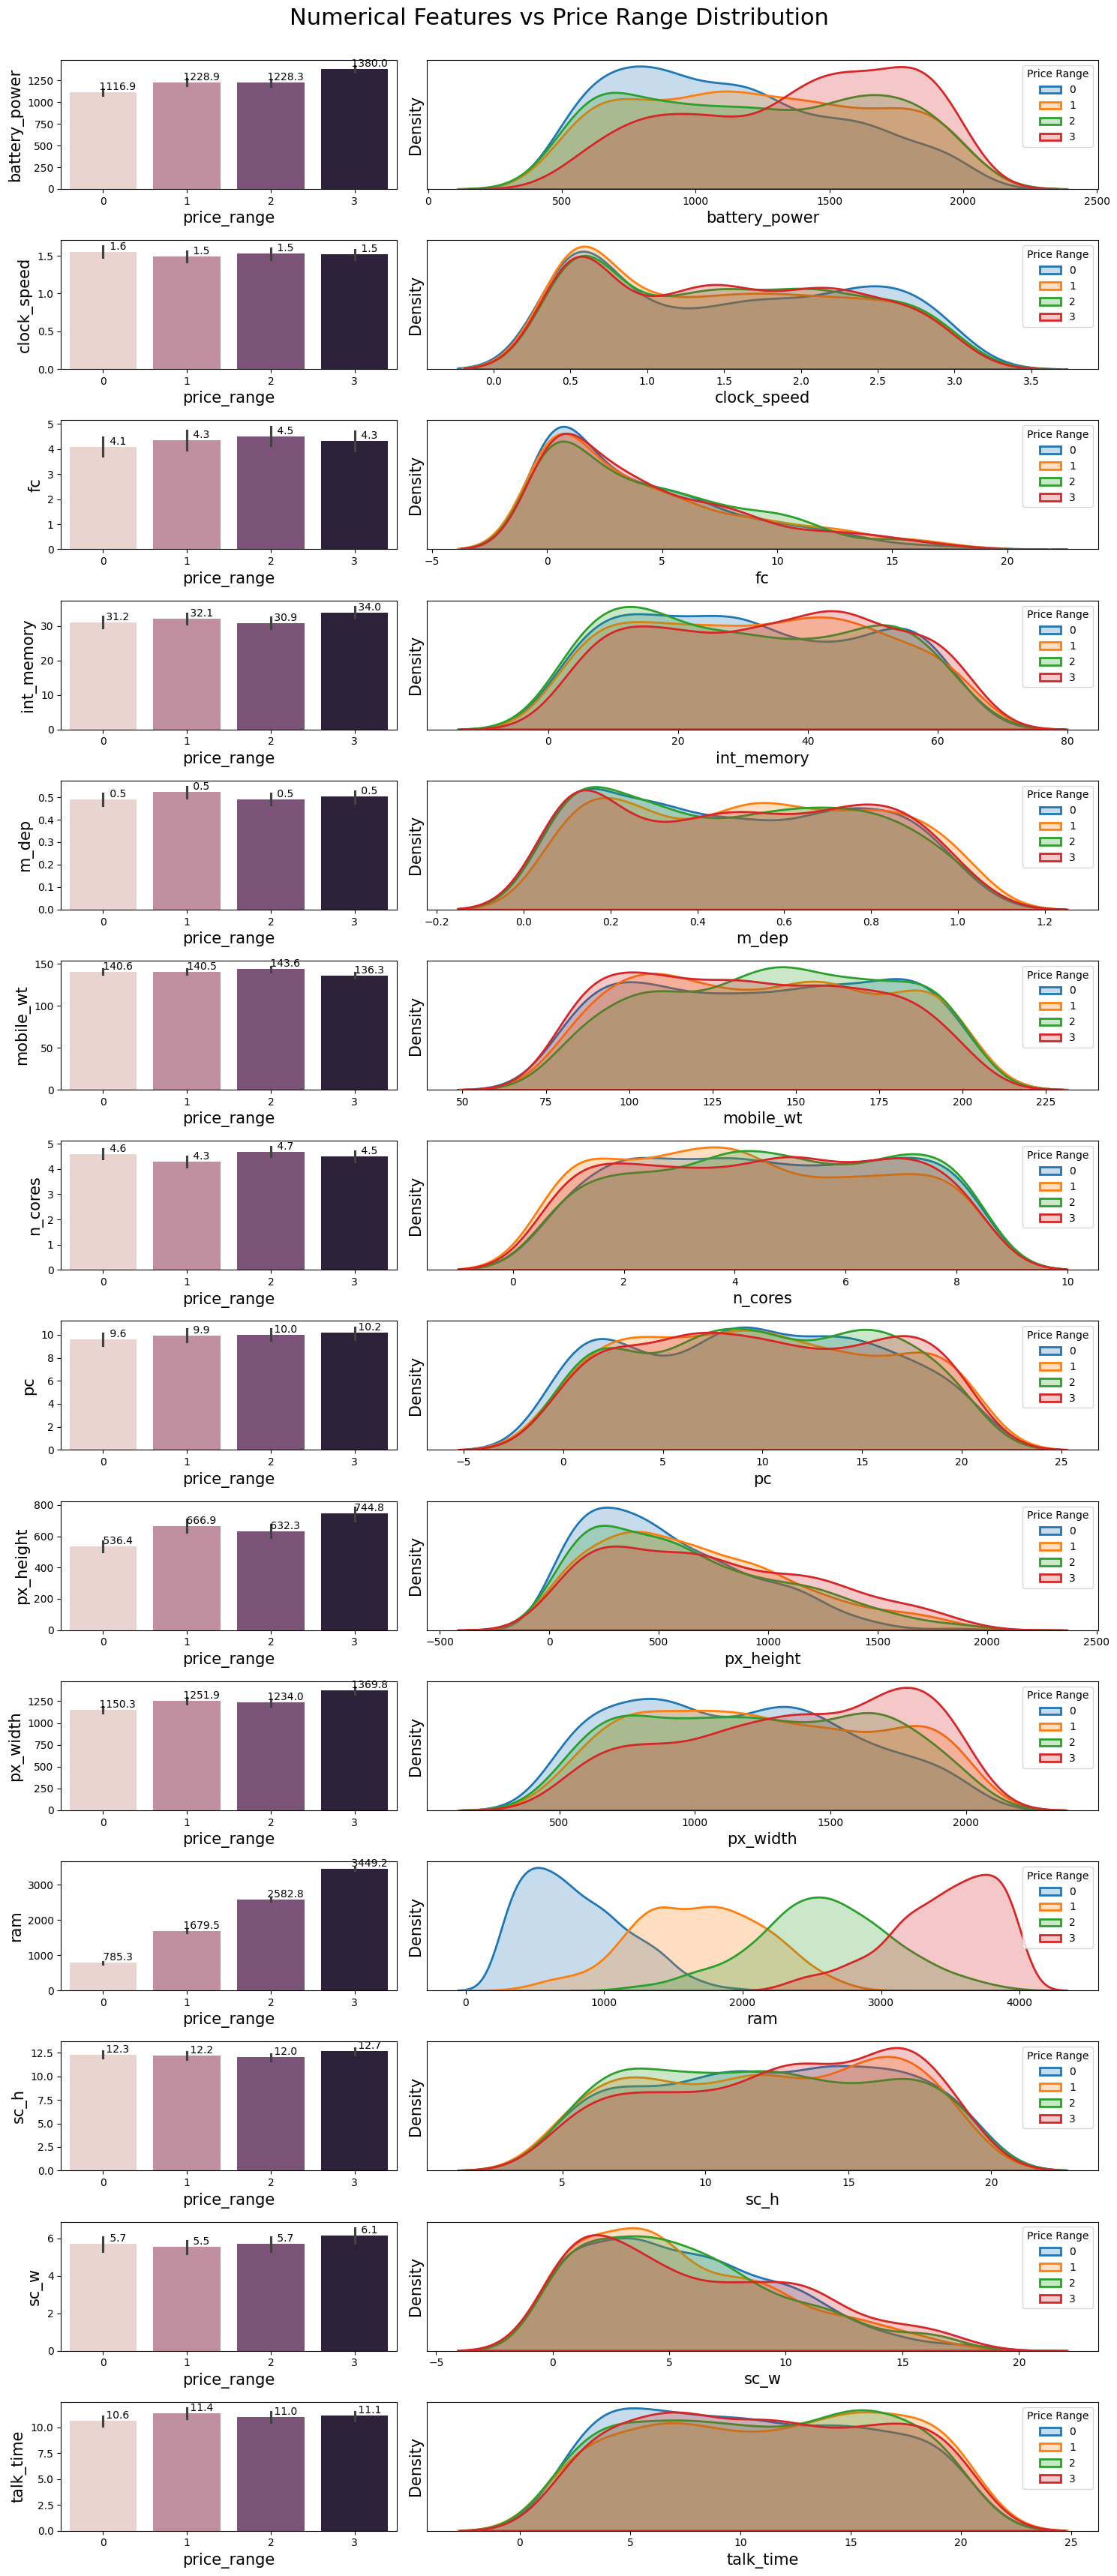

In [ ]:
fig, ax = plt.subplots(14, 2, figsize=(15,35), gridspec_kw={'width_ratios': [1, 2]})

for i, col in enumerate(df.drop(columns = categories).columns):
    # barplot
    graph = sns.barplot(data=df, x='price_range', y=col, hue = 'price_range', ax=ax[i, 0])
    graph.legend_.remove()
    # kde Plot
    sns.kdeplot(data=df[df['price_range']==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=df[df['price_range']==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    sns.kdeplot(data=df[df['price_range']==2], x=col, fill=True, linewidth=2, ax=ax[i,1], label='2')
    sns.kdeplot(data=df[df['price_range']==3], x=col, fill=True, linewidth=2, ax=ax[i,1], label='3')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Price Range', loc='upper right')
    # Add bar sizes to our plot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.1f')

# Increase font size of x and y labels
for i in range(len(ax)):
    for j in range(len(ax[i])):
        ax[i,j].set_xlabel(ax[i,j].get_xlabel(), fontsize=15)
        ax[i,j].set_ylabel(ax[i,j].get_ylabel(), fontsize=15)

plt.suptitle('Numerical Features vs Price Range Distribution', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.96)
plt.show()

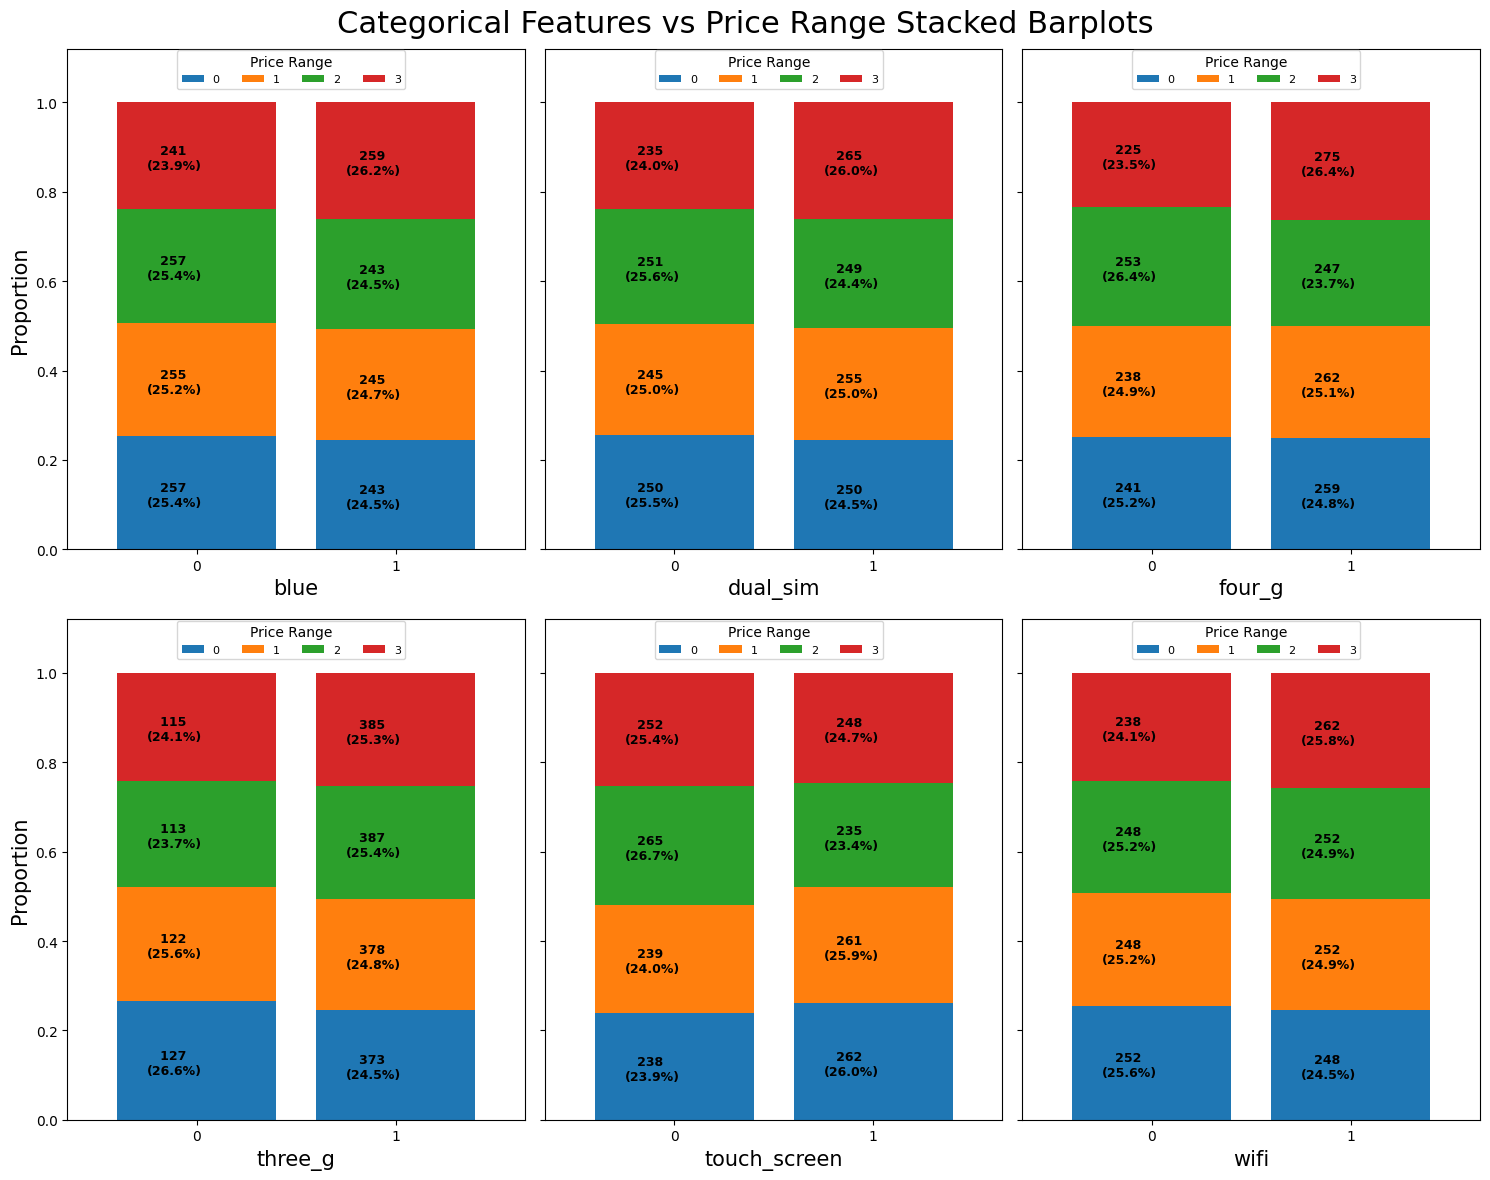

In [ ]:
# Create a 2x4 grid of subplots
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,12))

# Span subplot over two columns
# ax[1,2] = plt.subplot2grid((2,4), (1,2), colspan=2)

for i,col in enumerate(categories[:len(categories)-1]):

    # Create a cross tabulation showing the proportion of purchased and non-purchased loans for each category of the feature
    cross_tab = pd.crosstab(index=df[col], columns=df['price_range'])

    # Using the normalize=True argument gives us the index-wise proportion of the data
    cross_tab_prop = pd.crosstab(index=df[col], columns=df['price_range'], normalize='index')


    # Plot stacked bar charts
    x, y = i//3, i%3
    cross_tab_prop.plot(kind='bar', ax=ax[x,y], stacked=True, width=0.8, legend=False, ylabel='Proportion', sharey=True)

    # Add the proportions and counts of the individual bars to our plot
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
            ax[x,y].text(x=idx-0.25, y=(y_location-proportion)+(proportion/2)-0.03,
                         s = f'   {count}\n({np.round(proportion * 100, 1)}%)',
                         color = "black", fontsize=9, fontweight="bold")

    # Add legend
    ax[x,y].legend(title='Price Range', loc=(0.24,0.92), fontsize=8, ncol=4)
    # Set y limit
    ax[x,y].set_ylim([0,1.12])
    # Rotate xticks
    ax[x,y].set_xticklabels(ax[x,y].get_xticklabels(), rotation=0)
    # Increase xlabel & ylabel font sizes
    ax[x,y].set_ylabel('Proportion', fontsize=15)
    ax[x,y].set_xlabel(col, fontsize=15)

plt.suptitle('Categorical Features vs Price Range Stacked Barplots', fontsize=22)
plt.tight_layout()
plt.show()

# Applied Models:
- Logistic Regression - Support Vector Machine (SVM) - Decision Tree (DT) - Gradient Boosting

# **SPLITING**

In [ ]:
target = 'price_range'
X = df.drop(columns = target)
y = df[target]

In [ ]:
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (2000, 20)
y shape: (2000,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= 0.2, random_state= 42
)

In [ ]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (1600, 20)
y_train shape: (1600,)
X_test shape: (400, 20)
y_test shape: (400,)


# BUILD MODEL

## **Logistic Regression**

In [ ]:
lr_model = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))
lr_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=42))])

In [ ]:
acc_lr_train = lr_model.score(X_train, y_train)
acc_lr_test = lr_model.score(X_test, y_test)

print('acc_lr_train:', acc_lr_train)
print('acc_lr_test:', acc_lr_test)

acc_lr_train: 0.975625
acc_lr_test: 0.975


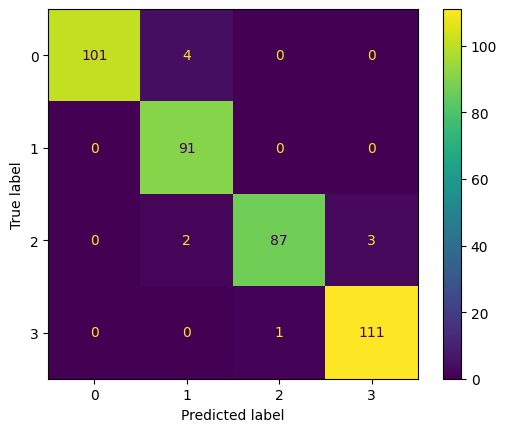

In [ ]:
ConfusionMatrixDisplay.from_estimator(lr_model, X_test, y_test);

In [ ]:
with open ('model_lr.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

In [ ]:
lr_params = {
    'logisticregression__C' : [0.1, 1, 10, 100, 1000],
    'logisticregression__solver' : ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'logisticregression__multi_class' : ['ovr', 'multinomial'],
}

In [ ]:
lr_model_grid = GridSearchCV(
    lr_model,
    param_grid = lr_params,
    cv = 5,
    n_jobs = -1,
    verbose = 1
)

lr_model_grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.1, 1, 10, 100, 1000],
                         'logisticregression__multi_class': ['ovr',
                                                             'multinomial'],
                         'logisticregression__solver': ['lbfgs', 'newton-cg',
                                                        'newton-cholesky',
                                                        'sag', 'saga']},
             verbose=1)

In [ ]:
lr_model_grid.fit(X_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.1, 1, 10, 100, 1000],
                         'logisticregression__multi_class': ['ovr',
                                                             'multinomial'],
                         'logisticregression__solver': ['lbfgs', 'newton-cg',
                                                        'newton-cholesky',
                                                        'sag', 'saga']},
             verbose=1)

In [ ]:
acc_lr_grid_train = lr_model_grid.score(X_train, y_train)
acc_lr_grid_test = lr_model_grid.score(X_test, y_test)

print('acc_lr_grid_train:', acc_lr_grid_train)
print('acc_lr_grid_test:', acc_lr_grid_test)

acc_lr_grid_train: 0.98875
acc_lr_grid_test: 0.98


In [ ]:
lr_model_grid.best_params_

{'logisticregression__C': 1000,
 'logisticregression__multi_class': 'multinomial',
 'logisticregression__solver': 'lbfgs'}

In [ ]:
lr_model_grid.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=1000, multi_class='multinomial',
                                    random_state=42))])

In [ ]:
print('LR grid search best score:', lr_model_grid.best_score_)

LR grid search best score: 0.96875


In [ ]:
print(accuracy_score(lr_model_grid.predict(X_test), y_test))

0.98


In [ ]:
print(classification_report(y_test, lr_model_grid.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       105
           1       0.95      1.00      0.97        91
           2       0.99      0.98      0.98        92
           3       0.98      0.99      0.99       112

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



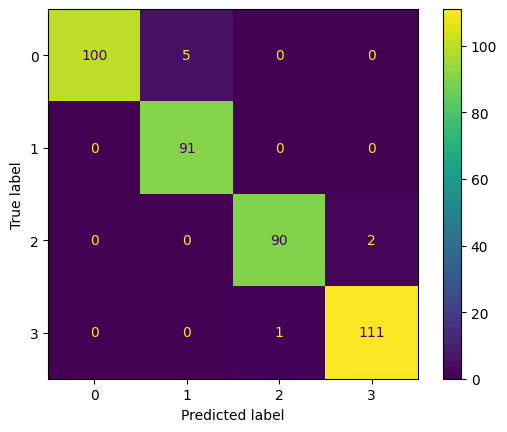

In [ ]:
ConfusionMatrixDisplay.from_estimator(lr_model_grid, X_test, y_test);

In [ ]:
with open ('model_lr_grid.pkl', 'wb') as f:
    pickle.dump(lr_model_grid, f)

# **SUPPORT VECTOR MACHINE**

In [ ]:
# svc_model = SVC()
# svc_model.fit(X_train_scaled, y_train)

svc_model = make_pipeline(StandardScaler(), SVC())
svc_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [ ]:
# acc_svc_train = svc_model.score(X_train_scaled, y_train)
# acc_svc_test = svc_model.score(X_test_scaled, y_test)

# print('acc_svc_train:', acc_svc_train)
# print('acc_svc_test:', acc_svc_test)


acc_svc_train = svc_model.score(X_train, y_train)
acc_svc_test = svc_model.score(X_test, y_test)

print('acc_svc_train:', acc_svc_train)
print('acc_svc_test:', acc_svc_test)

acc_svc_train: 0.983125
acc_svc_test: 0.8925


In [ ]:
print(accuracy_score(svc_model.predict(X_test), y_test))

0.8925


In [ ]:
# print(classification_report(y_test, svc_model.predict(X_test_scaled)))

print(classification_report(y_test, svc_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       105
           1       0.80      0.89      0.84        91
           2       0.84      0.82      0.83        92
           3       0.96      0.92      0.94       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



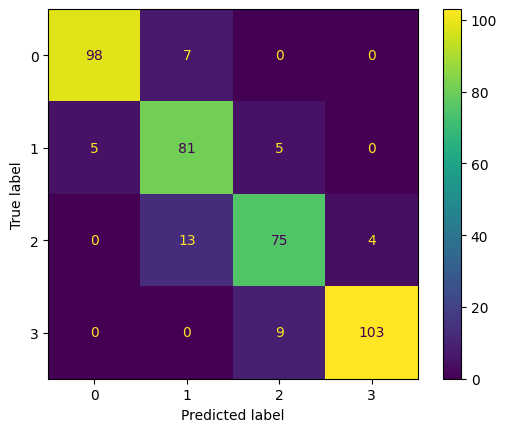

In [ ]:
ConfusionMatrixDisplay.from_estimator(svc_model, X_test, y_test);

In [ ]:
with open ('model_svc.pkl', 'wb') as f:
    pickle.dump(svc_model, f)

In [ ]:
# svc_params = {
#     'C' : [0.1, 1, 10, 100, 1000],
#     'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],
#     'kernel' : ['rbf']
# }



svc_params = {
    'svc__C' : [0.1, 1, 10, 100, 1000],
    'svc__gamma' : [1, 0.1, 0.01, 0.001, 0.0001],
    'svc__kernel' : ['rbf']
}

In [ ]:
svc_model_grid = GridSearchCV(
    svc_model,
    param_grid = svc_params,
    cv = 5,
    n_jobs = -1,
    verbose = 1
)

svc_model_grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10, 100, 1000],
                         'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'svc__kernel': ['rbf']},
             verbose=1)

In [ ]:
svc_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10, 100, 1000],
                         'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'svc__kernel': ['rbf']},
             verbose=1)

In [ ]:
# acc_svc_grid_train = svc_model_grid.score(X_train_scaled, y_train)
# acc_svc_grid_test = svc_model_grid.score(X_test_scaled, y_test)

# print('acc_svc_grid_train:', acc_svc_grid_train)
# print('acc_svc_grid_test:', acc_svc_grid_test)


acc_svc_grid_train = svc_model_grid.score(X_train, y_train)
acc_svc_grid_test = svc_model_grid.score(X_test, y_test)

print('acc_svc_grid_train:', acc_svc_grid_train)
print('acc_svc_grid_test:', acc_svc_grid_test)

acc_svc_grid_train: 0.994375
acc_svc_grid_test: 0.9575


In [ ]:
svc_model_grid.best_params_

{'svc__C': 1000, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}

In [ ]:
svc_model_grid.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1000, gamma=0.001))])

In [ ]:
print('SVC grid search best score:', svc_model_grid.best_score_)

SVC grid search best score: 0.940625


In [ ]:
print(accuracy_score(svc_model_grid.predict(X_test), y_test))

0.9575


In [ ]:
print(classification_report(y_test, svc_model_grid.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       105
           1       0.92      0.97      0.94        91
           2       0.95      0.95      0.95        92
           3       0.98      0.96      0.97       112

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



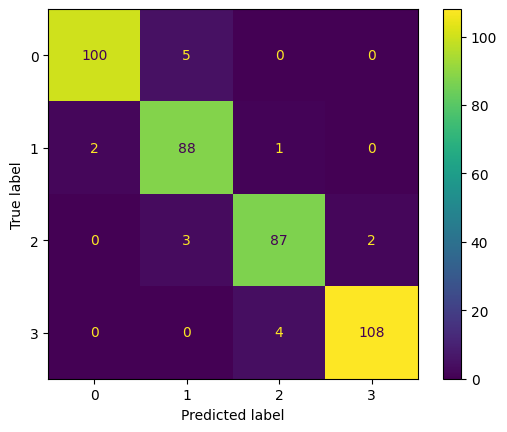

In [ ]:
ConfusionMatrixDisplay.from_estimator(svc_model_grid, X_test, y_test);

In [ ]:
with open ('model_svc_grid.pkl', 'wb') as f:
    pickle.dump(svc_model_grid, f)

# **DECISION TREE**

In [ ]:
dt_model = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state= 42))
dt_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [ ]:
acc_dt_train = dt_model.score(X_train, y_train)
acc_dt_test = dt_model.score(X_test, y_test)

print('acc_dt_train:', acc_dt_train)
print('acc_dt_test:', acc_dt_test)

acc_dt_train: 1.0
acc_dt_test: 0.835


In [ ]:
print(accuracy_score(dt_model.predict(X_test), y_test))

0.835


In [ ]:
print(classification_report(y_test, dt_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       105
           1       0.75      0.84      0.79        91
           2       0.80      0.71      0.75        92
           3       0.87      0.90      0.89       112

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.84      0.83      0.83       400



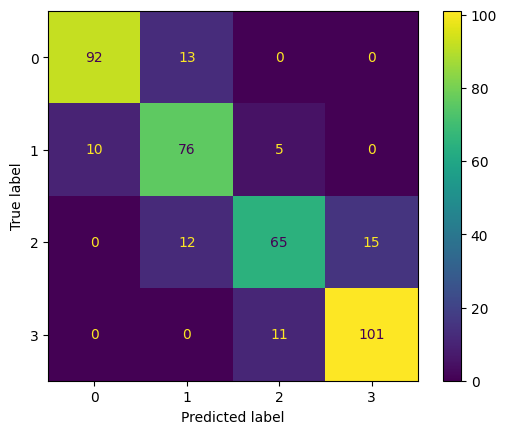

In [ ]:
ConfusionMatrixDisplay.from_estimator(dt_model, X_test, y_test);


In [ ]:
dt_model['decisiontreeclassifier'].feature_importances_

array([0.13114317, 0.00083347, 0.01192214, 0.00300049, 0.00612413,
       0.        , 0.00547376, 0.01002148, 0.01440414, 0.01010405,
       0.01183045, 0.08640137, 0.06707719, 0.62460495, 0.00532494,
       0.00453894, 0.00719532, 0.        , 0.        , 0.        ])

In [ ]:
dt_model.feature_names_in_

array(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'], dtype=object)

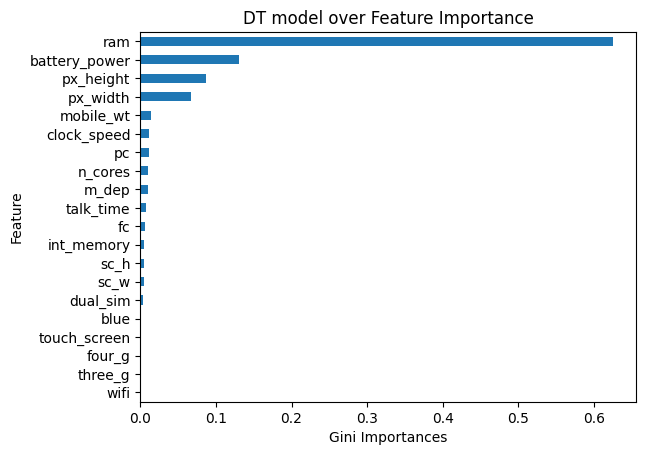

In [ ]:
dt_feat_imp = pd.Series(dt_model['decisiontreeclassifier'].feature_importances_, index = dt_model.feature_names_in_).sort_values()

dt_feat_imp.plot(kind = 'barh')
plt.xlabel('Gini Importances')
plt.ylabel('Feature')
plt.title('DT model over Feature Importance');

In [ ]:
with open ('model_dt.pkl', 'wb') as f:
    pickle.dump(dt_model, f)

In [ ]:
dt_params = {
    'decisiontreeclassifier__criterion' : ['gini', 'entropy'],
    'decisiontreeclassifier__splitter' : ['best', 'random'],
    'decisiontreeclassifier__max_depth' : [3, 5, 7, 10],
    'decisiontreeclassifier__min_samples_split' : range(2, 11, 1),
    'decisiontreeclassifier__min_samples_leaf' : range(2, 10, 1),
}

In [ ]:
dt_model_grid = GridSearchCV(
    dt_model,
    param_grid = dt_params,
    cv = 5,
    n_jobs = -1,
    verbose = 1
)

dt_model_grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': [3, 5, 7, 10],
                         'decisiontreeclassifier__min_samples_leaf': range(2, 10),
                         'decisiontreeclassifier__min_samples_split': range(2, 11),
                         'decisiontreeclassifier__splitter': ['best',
                                                              'random']},
             verbose=1)

In [ ]:
dt_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': [3, 5, 7, 10],
                         'decisiontreeclassifier__min_samples_leaf': range(2, 10),
                         'decisiontreeclassifier__min_samples_split': range(2, 11),
                         'decisiontreeclassifier__splitter': ['best',
                                                              'random']},
             verbose=1)

In [ ]:
acc_dt_grid_train = dt_model_grid.score(X_train, y_train)
acc_dt_grid_test = dt_model_grid.score(X_test, y_test)

print('acc_dt_grid_train:', acc_dt_grid_train)
print('acc_dt_grid_test:', acc_dt_grid_test)

acc_dt_grid_train: 0.981875
acc_dt_grid_test: 0.8525


In [ ]:
dt_model_grid.best_params_

{'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 10,
 'decisiontreeclassifier__min_samples_leaf': 2,
 'decisiontreeclassifier__min_samples_split': 5,
 'decisiontreeclassifier__splitter': 'best'}

In [ ]:
dt_model_grid.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=10,
                                        min_samples_leaf=2, min_samples_split=5,
                                        random_state=42))])

In [ ]:
print('DT grid search best score:', dt_model_grid.best_score_)

DT grid search best score: 0.85875


In [ ]:
print(accuracy_score(dt_model_grid.predict(X_test), y_test))

0.8525


In [ ]:
print(accuracy_score(dt_model_grid.predict(X_test), y_test))

0.8525


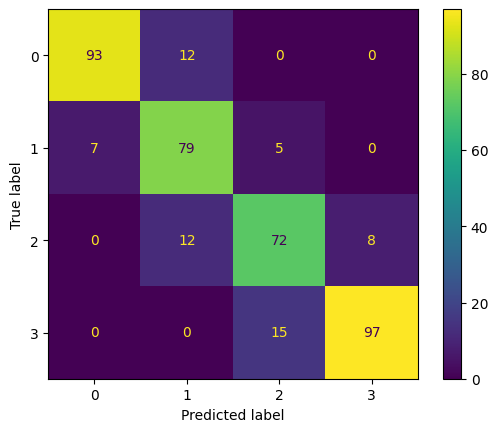

In [ ]:
ConfusionMatrixDisplay.from_estimator(dt_model_grid, X_test, y_test);

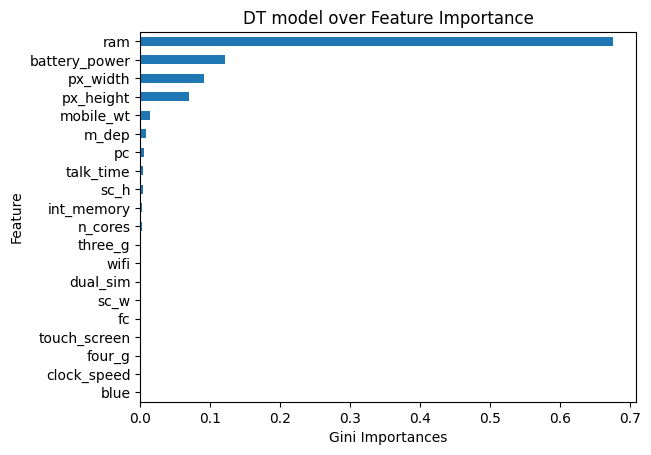

In [ ]:
dt_grid_feat_imp = pd.Series(dt_model_grid.best_estimator_.named_steps['decisiontreeclassifier'].feature_importances_, index = dt_model_grid.feature_names_in_).sort_values()

dt_grid_feat_imp.plot(kind = 'barh')
plt.xlabel('Gini Importances')
plt.ylabel('Feature')
plt.title('DT model over Feature Importance');

In [ ]:
with open ('model_dt_grid.pkl', 'wb') as f:
    pickle.dump(dt_model_grid, f)

# **GRADIENT BOOSTING**

In [ ]:
gb_model = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state= 42))
gb_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=42))])

In [ ]:
acc_gb_train = gb_model.score(X_train, y_train)
acc_gb_test = gb_model.score(X_test, y_test)

print('acc_gb_train:', acc_gb_train)
print('acc_gb_test:', acc_gb_test)

acc_gb_train: 0.999375
acc_gb_test: 0.905


In [ ]:
print(accuracy_score(gb_model.predict(X_test), y_test))


0.905


In [ ]:
print(classification_report(y_test, gb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       105
           1       0.89      0.89      0.89        91
           2       0.82      0.87      0.85        92
           3       0.94      0.90      0.92       112

    accuracy                           0.91       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.91      0.91      0.91       400



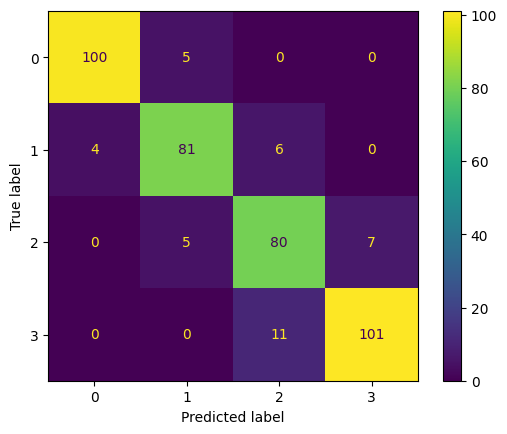

In [ ]:
ConfusionMatrixDisplay.from_estimator(gb_model, X_test, y_test);


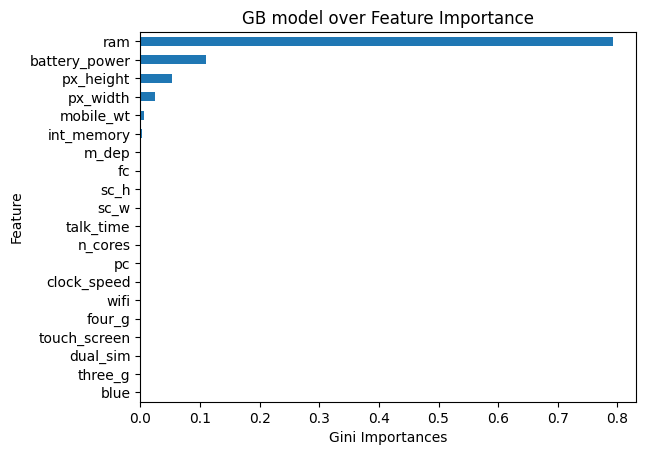

In [ ]:
gb_feat_imp = pd.Series(gb_model['gradientboostingclassifier'].feature_importances_, index = gb_model.feature_names_in_).sort_values()

gb_feat_imp.plot(kind = 'barh')
plt.xlabel('Gini Importances')
plt.ylabel('Feature')
plt.title('GB model over Feature Importance');

In [ ]:
with open ('model_gb.pkl', 'wb') as f:
    pickle.dump(gb_model, f)

In [ ]:
gb_params = {
    'gradientboostingclassifier__n_estimators': range(25, 151, 25),
    'gradientboostingclassifier__max_depth' : [3, 5, 7, 10],
}

In [ ]:
gb_model_grid = GridSearchCV(
    gb_model,
    param_grid = gb_params,
    cv = 5,
    n_jobs = -1,
    verbose = 1
)

gb_model_grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_depth': [3, 5, 7, 10],
                         'gradientboostingclassifier__n_estimators': range(25, 151, 25)},
             verbose=1)

In [ ]:
gb_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_depth': [3, 5, 7, 10],
                         'gradientboostingclassifier__n_estimators': range(25, 151, 25)},
             verbose=1)

In [ ]:
acc_gb_grid_train = gb_model_grid.score(X_train, y_train)
acc_gb_grid_test = gb_model_grid.score(X_test, y_test)

print('acc_gb_grid_train:', acc_gb_grid_train)
print('acc_gb_grid_test:', acc_gb_grid_test)

acc_gb_grid_train: 1.0
acc_gb_grid_test: 0.91


In [ ]:
gb_model_grid.best_params_

{'gradientboostingclassifier__max_depth': 3,
 'gradientboostingclassifier__n_estimators': 125}

In [ ]:
gb_model_grid.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(n_estimators=125,
                                            random_state=42))])

In [ ]:
print('GB grid search best score:', gb_model_grid.best_score_)

GB grid search best score: 0.8975


In [ ]:
print(accuracy_score(gb_model_grid.predict(X_test), y_test))

0.91


In [ ]:
print(classification_report(y_test, gb_model_grid.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       105
           1       0.90      0.91      0.91        91
           2       0.83      0.87      0.85        92
           3       0.93      0.89      0.91       112

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



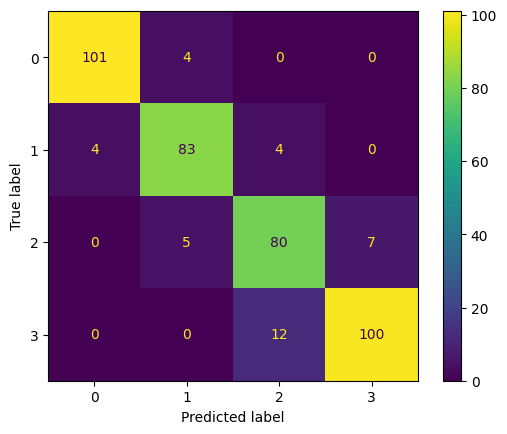

In [ ]:
ConfusionMatrixDisplay.from_estimator(gb_model_grid, X_test, y_test);


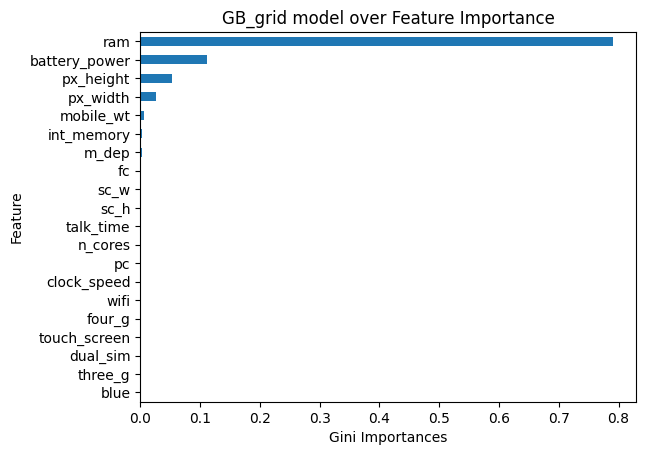

In [ ]:
gb_grid_feat_imp = pd.Series(gb_model_grid.best_estimator_.named_steps['gradientboostingclassifier'].feature_importances_, index = gb_model_grid.feature_names_in_).sort_values()

gb_grid_feat_imp.plot(kind = 'barh')
plt.xlabel('Gini Importances')
plt.ylabel('Feature')
plt.title('GB_grid model over Feature Importance');

In [ ]:
with open ('model_gb_grid.pkl', 'wb') as f:
    pickle.dump(gb_model_grid, f)

# COMBINE ALL MODELS

In [ ]:
all_models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Logistic Regression CV', 'Support Vector Classifier', 'Support Vector CV', 'Decision Tree Classifier', 'Decision Tree Classifier CV','Gradient Boosting Classifier', 'Gradient Boosting Classifier CV'],
    'Score': [acc_lr_test, acc_lr_grid_test, acc_svc_test, acc_svc_grid_test, acc_dt_test, acc_dt_grid_test,acc_gb_test, acc_gb_grid_test]
})

all_models = all_models.sort_values(by = 'Score', ascending = False)
all_models['score_perc'] = all_models['Score'] * 100

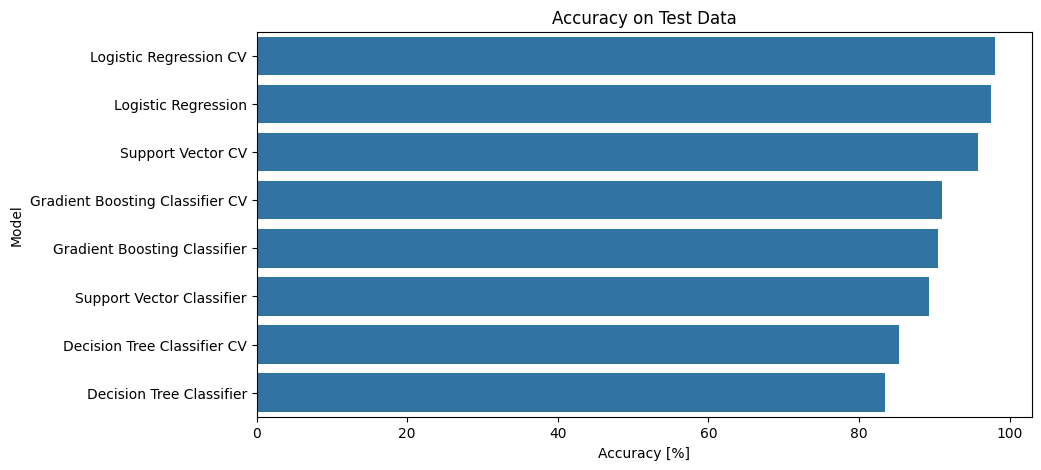

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data = all_models, y='Model' , x='score_perc')
plt.title('Accuracy on Test Data')
plt.xlabel("Accuracy [%]")
plt.ylabel("Model")
plt.show()

**Among the examined classifiers, Logistic Regression got the best accuracy:**

In [ ]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    if 'id' in df.columns:
        df = df.drop(columns='id')
    if 'price_range' in df.columns:
        df = df.drop(columns='price_range')

    return df

def make_predictions(data_filepath, model_filepath):

    # data_file = pd.read_csv(data_filepath, usecols=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi'])
    # data_file = pd.read_csv(data_filepath).drop(columns='id')
    data_file = wrangle(data_filepath)

    # std_scaler = StandardScaler()
    # X_test = std_scaler.fit_transform(data_file)

    with open(model_filepath, 'rb') as f:
        model = pickle.load(f)

    y_test_pred = model.predict(data_file)

    y_test_pred = pd.Series(y_test_pred, index = data_file.index, name = 'mobile_price_class')

    return y_test_pred

In [ ]:
make_predictions('test.csv', 'model_lr_grid.pkl')

0      3
1      3
2      2
3      3
4      1
      ..
995    2
996    1
997    0
998    2
999    2
Name: mobile_price_class, Length: 1000, dtype: int64